<a href="https://colab.research.google.com/github/shoulhafiz/python_data_science/blob/master/deep_learning_TF2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install tensorflow-gpu

     |████████████████████████████████| 380.8MB 44kB/s 
     |████████████████████████████████| 450kB 45.2MB/s 
     |████████████████████████████████| 3.8MB 33.4MB/s 
     |████████████████████████████████| 81kB 10.8MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.1 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goog

In [1]:
import tensorflow as tf
tf.__version__

'2.0.0'

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15229465427160945030
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 11482469489286773970
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 6448581032822506624
physical_device_desc: "device: XLA_GPU device"
]


In [3]:
!nvidia-smi

Wed Nov 20 06:13:00 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.50       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   74C    P0    75W / 149W |     67MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2318 - accuracy: 0.9308
Epoch 2/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0953 - accuracy: 0.9702
Epoch 3/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0678 - accuracy: 0.9784
Epoch 4/5
60000/60000 [==============================] - 6s 96us/sample - loss: 0.0516 - accuracy: 0.9833
Epoch 5/5
60000/60000 [==============================] - 6s 94us/sample - loss: 0.0419 - accuracy: 0.9868
10000/1 - 1s - loss: 0.0382 - accuracy: 0.9770


[0.07586844365989381, 0.977]

In [7]:
import cv2
im_gray = cv2.imread('export.png', cv2.IMREAD_GRAYSCALE)
im_gray.shape

(600, 1000)

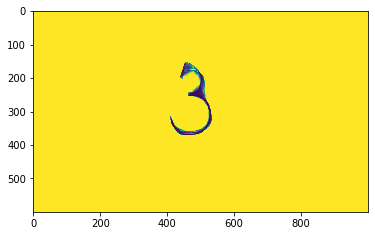

In [9]:
import matplotlib.pyplot as plt

plt.imshow(im_gray)

In [10]:
resize_im_gray = cv2.resize(im_gray, (28, 28))
resize_im_gray = cv2.bitwise_not(resize_im_gray) / 255
resize_im_gray.shape

(28, 28)

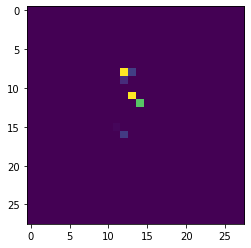

In [11]:
plt.imshow(resize_im_gray)

In [12]:
import numpy as np

predicted = model.predict(np.array([resize_im_gray]))[0]
predicted

np.argmax(predicted)

5